In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import time

from tensorflow.keras.layers import Input, Conv2D, Concatenate, Embedding, Flatten, AvgPool2D, GlobalAvgPool2D, Dense, Reshape, Lambda, Activation, BatchNormalization, GlobalAveragePooling2D, UpSampling2D, ReLU, MaxPool2D, Dropout, Softmax
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential

from utils.data import tfr_dataset_eager, parse_chairs
from utils import image

In [4]:
parse_fn = lambda x: parse_chairs(x, resize=64)
# change the data path to where your TFR file is
data = tfr_dataset_eager("chairs/tfrs/chairs.tfr", 256, parse_fn, shufrep=80000)

In [18]:
inp_c = Input(shape=(1,))
inp_rot = Input(shape=(2,))
inp_elev = Input(shape=(2,))

id_embedding_initial = Embedding(input_dim=1396, output_dim=40, input_length=1, trainable=False)
id_embedding = id_embedding_initial(inp_c)
x = Flatten()(id_embedding)
dense_c = Dense(512, activation='relu', name='fc1_c')(x)
dense_c = Dense(512, activation='relu', name='fc2_c')(dense_c)

conc_v = Concatenate()([inp_rot, inp_elev])
dense_v = Dense(512, activation='relu', name='fc1_v')(conc_v)
dense_v = Dense(512, activation='relu', name='fc2_v')(dense_v)

conc_vc = Concatenate()([dense_c, dense_v])

fc = Dense(1024, activation='relu', name='fc3')(conc_vc)
fc = Dense(1024, activation='relu', name='fc4')(fc)


fc = Dense(16384, activation='relu', name='fc5')(fc)
reshaped = Reshape((8,8,256))(fc)

conv = Conv2D(256, 5, strides=1, padding='same', activation='relu', name='conv1')(reshaped)

ups = UpSampling2D(size=2)(conv)
conv = Conv2D(92, 5, strides=1, padding='same', activation='relu', name='conv2')(ups)
ups = UpSampling2D(size=2)(conv)
conv = Conv2D(92, 5, strides=1, padding='same', activation='relu', name='conv3')(ups)
ups = UpSampling2D(size=2)(conv)

out = Conv2D(3, 5, strides=1, padding='same', name='conv4')(ups)

model = Model([inp_c, inp_rot, inp_elev], out)

In [19]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 40)        55840       input_8[0][0]                    
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 2)]          0                                            
____________________________________________________________________________________________

In [15]:
def ind_to_circle(inds):
    rads = tf.cast(inds, tf.float32) / 32 * 2*tf.convert_to_tensor(np.pi, dtype=tf.float32)
    return tf.stack([tf.math.cos(rads), tf.math.sin(rads)], axis=1)

#Reconstruction Loss
def r_loss(g_t, out):
    return K.mean(K.square(g_t - out), axis = [1,2,3])

W0523 05:24:15.045452 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 0 Loss: 0.9458779096603394


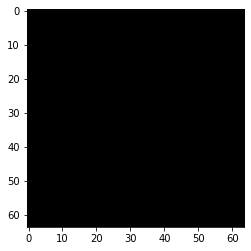

Step: 200 Loss: 0.02359522134065628
Step: 400 Loss: 0.021724876016378403


W0523 05:29:50.599090 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 600 Loss: 0.01775294356048107


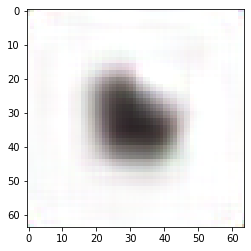

Step: 800 Loss: 0.016672255471348763
Step: 1000 Loss: 0.015712197870016098


W0523 05:35:23.690342 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 1200 Loss: 0.014406414702534676


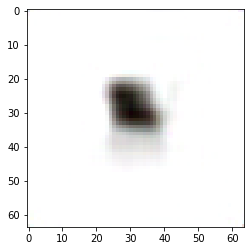

Step: 1400 Loss: 0.014520056545734406
Step: 1600 Loss: 0.01334383711218834


W0523 05:40:56.751673 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 1800 Loss: 0.013509228825569153


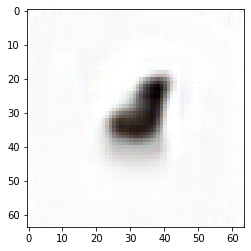

Step: 2000 Loss: 0.012231726199388504
Step: 2200 Loss: 0.01234189048409462


W0523 05:46:33.039377 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 2400 Loss: 0.012071290984749794


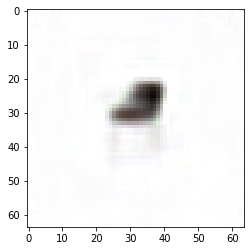

Step: 2600 Loss: 0.01219040434807539
Step: 2800 Loss: 0.011048270389437675


W0523 05:52:07.011274 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 3000 Loss: 0.01116152759641409


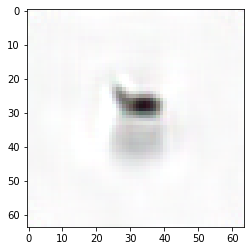

Step: 3200 Loss: 0.010850869119167328
Step: 3400 Loss: 0.010386486537754536


W0523 05:57:39.759443 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 3600 Loss: 0.010348576121032238


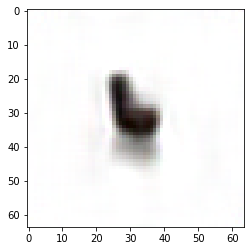

Step: 3800 Loss: 0.010325074195861816
Step: 4000 Loss: 0.010447148233652115


W0523 06:03:13.109006 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 4200 Loss: 0.009366455487906933


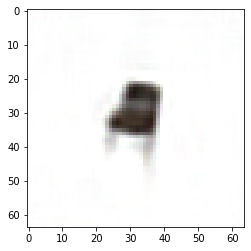

Step: 4400 Loss: 0.009494205936789513
Step: 4600 Loss: 0.009003469720482826
Step: 4800 Loss: 0.009615068323910236


W0523 06:08:48.473178 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


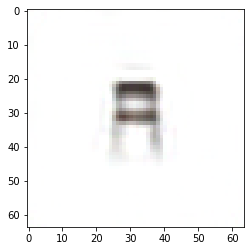

Step: 5000 Loss: 0.008576897904276848
Step: 5200 Loss: 0.008570227771997452


W0523 06:14:26.949030 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 5400 Loss: 0.008636804297566414


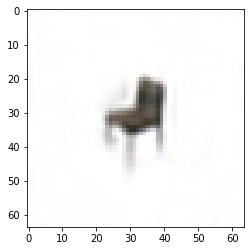

Step: 5600 Loss: 0.008084476925432682
Step: 5800 Loss: 0.008372445590794086


W0523 06:20:02.617390 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 6000 Loss: 0.008225427009165287


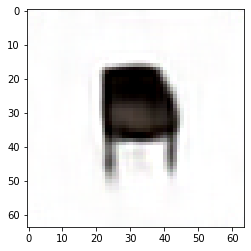

Step: 6200 Loss: 0.008408959954977036
Step: 6400 Loss: 0.008114509284496307


W0523 06:25:39.430689 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 6600 Loss: 0.007744388654828072


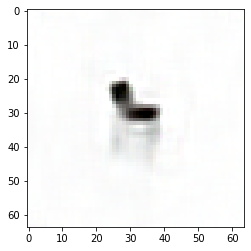

Step: 6800 Loss: 0.007797526195645332
Step: 7000 Loss: 0.007198592182248831


W0523 06:31:15.642595 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 7200 Loss: 0.007623786106705666


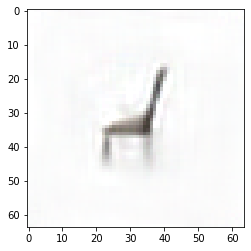

Step: 7400 Loss: 0.007588221225887537
Step: 7600 Loss: 0.007159988395869732


W0523 06:36:52.729163 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 7800 Loss: 0.007541244383901358


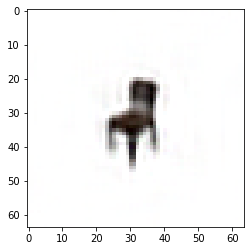

Step: 8000 Loss: 0.007338081020861864
Step: 8200 Loss: 0.006971239577978849


W0523 06:42:30.053096 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 8400 Loss: 0.0070038242265582085


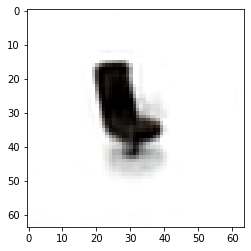

Step: 8600 Loss: 0.006709132343530655
Step: 8800 Loss: 0.007068539038300514


W0523 06:48:04.918602 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 9000 Loss: 0.007051724009215832


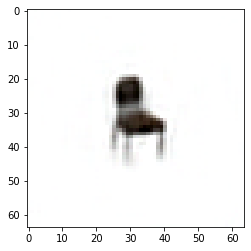

Step: 9200 Loss: 0.006955626420676708
Step: 9400 Loss: 0.0070096636191010475


W0523 06:53:39.217624 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 9600 Loss: 0.0063636028207838535


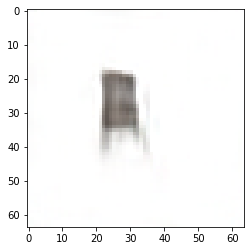

Step: 9800 Loss: 0.006323876790702343
Step: 10000 Loss: 0.006580374203622341


W0523 06:59:14.109062 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 10200 Loss: 0.00631489185616374


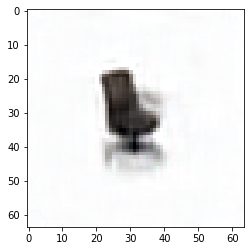

Step: 10400 Loss: 0.006575071718543768
Step: 10600 Loss: 0.006248315330594778


W0523 07:04:49.736532 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 10800 Loss: 0.006240316666662693


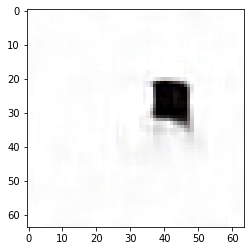

Step: 11000 Loss: 0.006383025087416172
Step: 11200 Loss: 0.006018139887601137


W0523 07:10:26.901889 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 11400 Loss: 0.006199055351316929


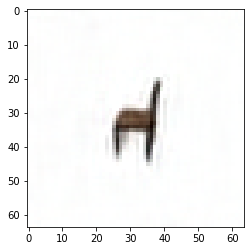

Step: 11600 Loss: 0.006150979548692703
Step: 11800 Loss: 0.006467543076723814


W0523 07:16:07.661633 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 12000 Loss: 0.006330396514385939


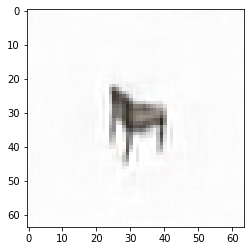

Step: 12200 Loss: 0.005782995838671923
Step: 12400 Loss: 0.005967130418866873


W0523 07:21:44.402126 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 12600 Loss: 0.005674195475876331


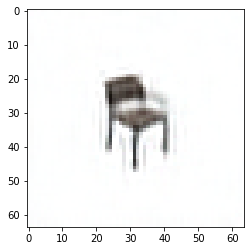

Step: 12800 Loss: 0.005940847098827362
Step: 13000 Loss: 0.00549970893189311


W0523 07:27:23.932159 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 13200 Loss: 0.0054323021322488785


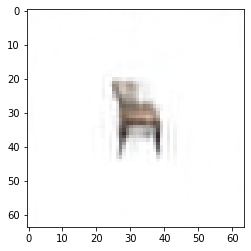

Step: 13400 Loss: 0.005865655839443207
Step: 13600 Loss: 0.005267600528895855


W0523 07:33:01.989132 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 13800 Loss: 0.005619453731924295


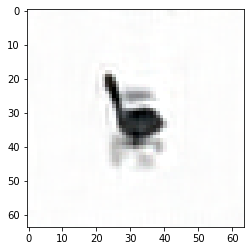

Step: 14000 Loss: 0.005325980018824339
Step: 14200 Loss: 0.005332869943231344


W0523 07:38:37.387215 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 14400 Loss: 0.005129256751388311


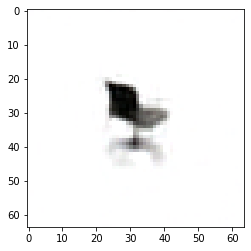

Step: 14600 Loss: 0.005413758102804422
Step: 14800 Loss: 0.005407857708632946


W0523 07:44:14.829830 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 15000 Loss: 0.005095016676932573


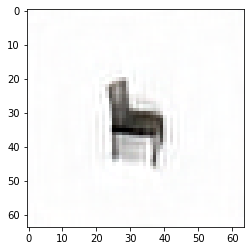

Step: 15200 Loss: 0.004859733860939741
Step: 15400 Loss: 0.00533127598464489


W0523 07:49:53.439325 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 15600 Loss: 0.005083021707832813


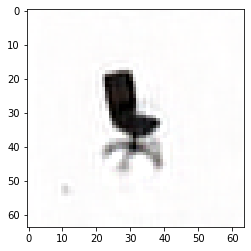

Step: 15800 Loss: 0.005161418113857508
Step: 16000 Loss: 0.0049197375774383545


W0523 07:55:28.936144 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 16200 Loss: 0.005008409731090069


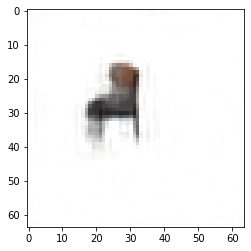

Step: 16400 Loss: 0.0049399263225495815
Step: 16600 Loss: 0.004925349727272987


W0523 08:01:06.322909 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 16800 Loss: 0.005117584951221943


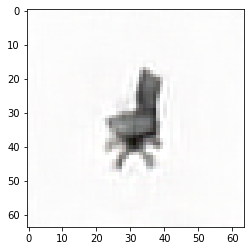

Step: 17000 Loss: 0.004783370532095432
Step: 17200 Loss: 0.004930203780531883


W0523 08:06:44.157477 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 17400 Loss: 0.004653057083487511


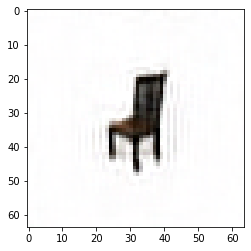

Step: 17600 Loss: 0.004863292444497347
Step: 17800 Loss: 0.004850404337048531


W0523 08:12:22.121697 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 18000 Loss: 0.004631470888853073


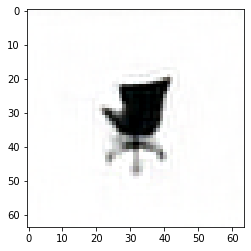

Step: 18200 Loss: 0.004595314618200064
Step: 18400 Loss: 0.0048635853454470634


W0523 08:18:01.781383 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 18600 Loss: 0.00464670592918992


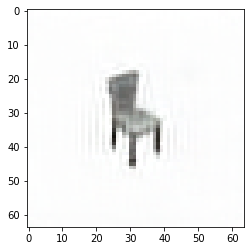

Step: 18800 Loss: 0.00467569287866354
Step: 19000 Loss: 0.004342367872595787


W0523 08:23:37.815764 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 19200 Loss: 0.004573839716613293


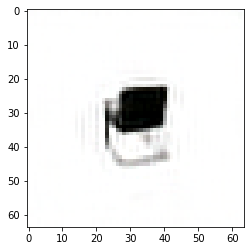

Step: 19400 Loss: 0.004692784510552883
Step: 19600 Loss: 0.004461297299712896


W0523 08:29:15.415958 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 19800 Loss: 0.004466165788471699


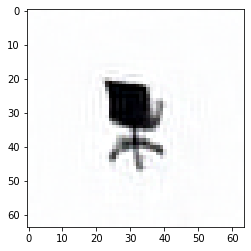

Step: 20000 Loss: 0.004490854684263468
Step: 20200 Loss: 0.004462852608412504


W0523 08:34:51.672745 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 20400 Loss: 0.004403652157634497


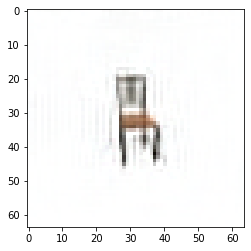

Step: 20600 Loss: 0.004178142640739679
Step: 20800 Loss: 0.004310827702283859


W0523 08:40:29.383643 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 21000 Loss: 0.004396900534629822


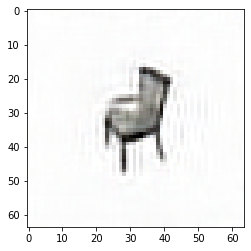

Step: 21200 Loss: 0.004643382504582405
Step: 21400 Loss: 0.004204450640827417


W0523 08:46:05.491827 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 21600 Loss: 0.004336733836680651


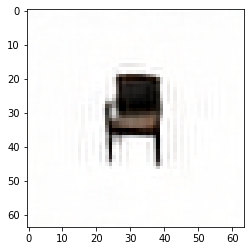

Step: 21800 Loss: 0.0046083396300673485
Step: 22000 Loss: 0.004204065538942814
Step: 22200 Loss: 0.0044598570093512535


W0523 08:51:40.036193 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


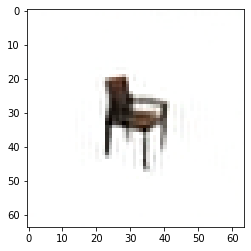

Step: 22400 Loss: 0.004112105816602707
Step: 22600 Loss: 0.004024843219667673


W0523 08:57:14.437940 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 22800 Loss: 0.0042029861360788345


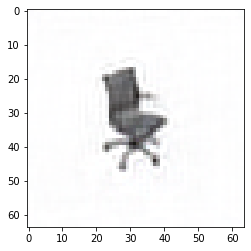

Step: 23000 Loss: 0.004357378929853439
Step: 23200 Loss: 0.004048383329063654


W0523 09:02:49.500919 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 23400 Loss: 0.003912215121090412


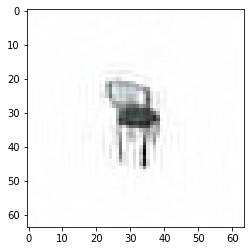

Step: 23600 Loss: 0.004083060659468174
Step: 23800 Loss: 0.004093962721526623


W0523 09:08:25.229119 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 24000 Loss: 0.003987717442214489


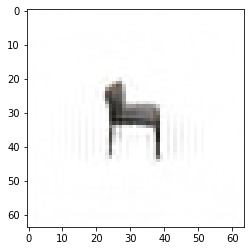

Step: 24200 Loss: 0.004130990244448185
Step: 24400 Loss: 0.004121460951864719


W0523 09:14:02.541084 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 24600 Loss: 0.004089964088052511


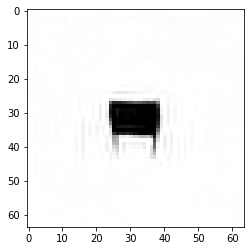

Step: 24800 Loss: 0.003955192863941193
Step: 25000 Loss: 0.004132880829274654


W0523 09:19:39.726387 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 25200 Loss: 0.004228365607559681


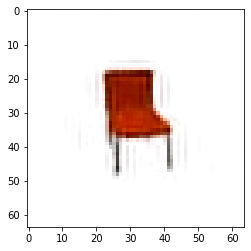

Step: 25400 Loss: 0.004031458869576454
Step: 25600 Loss: 0.003795838449150324


W0523 09:25:17.529040 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 25800 Loss: 0.0037295669317245483


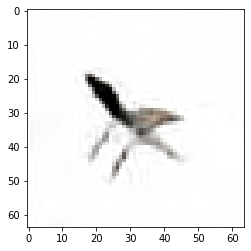

Step: 26000 Loss: 0.0040326849557459354
Step: 26200 Loss: 0.0037868968211114407


W0523 09:30:55.131228 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 26400 Loss: 0.004032921511679888


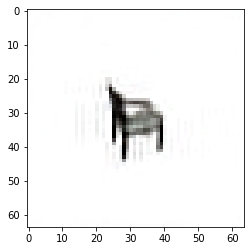

Step: 26600 Loss: 0.003746427595615387
Step: 26800 Loss: 0.004229502286761999


W0523 09:36:32.595785 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 27000 Loss: 0.003922588191926479


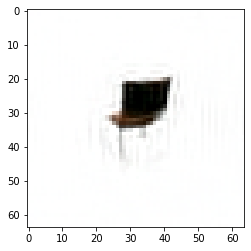

Step: 27200 Loss: 0.0037851613014936447
Step: 27400 Loss: 0.004068299662321806


W0523 09:42:07.626849 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 27600 Loss: 0.003986057825386524


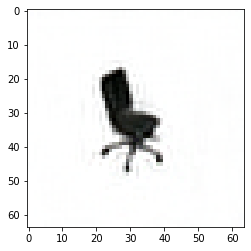

Step: 27800 Loss: 0.004175927489995956
Step: 28000 Loss: 0.003837543074041605


W0523 09:47:47.116990 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 28200 Loss: 0.003904959885403514


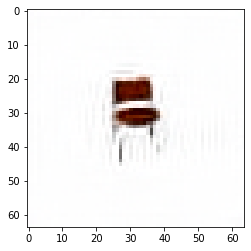

Step: 28400 Loss: 0.0037332274951040745
Step: 28600 Loss: 0.004026105161756277


W0523 09:53:24.933605 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 28800 Loss: 0.00356516195461154


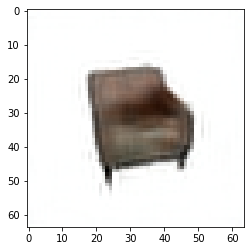

Step: 29000 Loss: 0.003799854312092066
Step: 29200 Loss: 0.0035753478296101093


W0523 09:59:01.892514 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 29400 Loss: 0.0036804035771638155


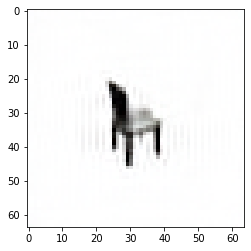

Step: 29600 Loss: 0.0036531761288642883
Step: 29800 Loss: 0.0038608640898019075


W0523 10:04:37.629690 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 30000 Loss: 0.003932963591068983


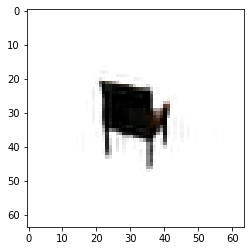

Step: 30200 Loss: 0.0037411018274724483
Step: 30400 Loss: 0.003854338778182864


W0523 10:10:15.072305 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 30600 Loss: 0.003577636554837227


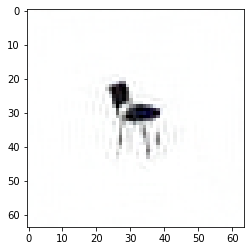

Step: 30800 Loss: 0.0037371895741671324
Step: 31000 Loss: 0.003661502618342638


W0523 10:15:52.279550 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 31200 Loss: 0.0034737668465822935


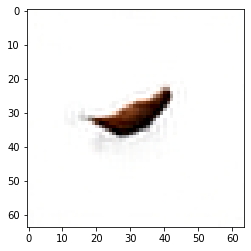

Step: 31400 Loss: 0.003515207674354315
Step: 31600 Loss: 0.003743415232747793


W0523 10:21:28.386736 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 31800 Loss: 0.003661452792584896


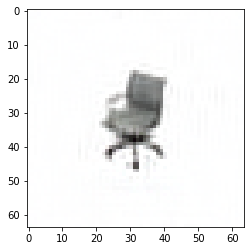

Step: 32000 Loss: 0.0038337591104209423
Step: 32200 Loss: 0.0036368519067764282


W0523 10:27:06.180413 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 32400 Loss: 0.0038952070754021406


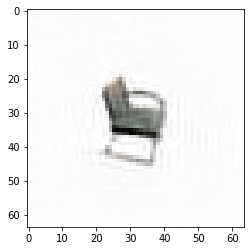

Step: 32600 Loss: 0.0038231080397963524
Step: 32800 Loss: 0.00384921720251441


W0523 10:32:43.390650 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 33000 Loss: 0.003803154919296503


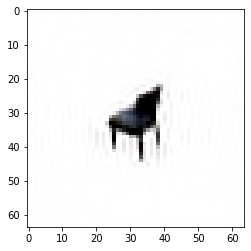

Step: 33200 Loss: 0.003594064386561513
Step: 33400 Loss: 0.003512164345011115


W0523 10:38:19.992514 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 33600 Loss: 0.0037000004667788744


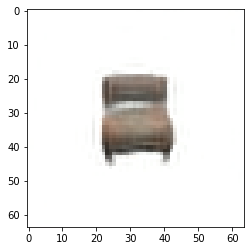

Step: 33800 Loss: 0.0036353939212858677
Step: 34000 Loss: 0.003605733159929514


W0523 10:43:57.014255 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 34200 Loss: 0.0035126344300806522


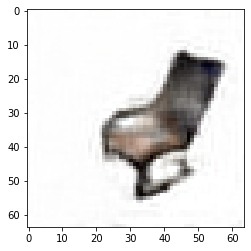

Step: 34400 Loss: 0.003460446372628212
Step: 34600 Loss: 0.0035713682882487774


W0523 10:49:32.547975 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 34800 Loss: 0.0034599020145833492


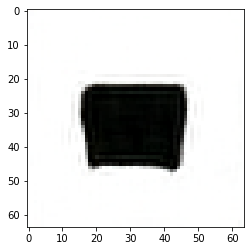

Step: 35000 Loss: 0.0037078242748975754
Step: 35200 Loss: 0.003513531293720007


W0523 10:55:07.775514 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 35400 Loss: 0.003427745308727026


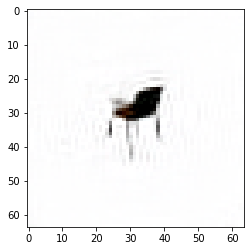

Step: 35600 Loss: 0.0035994877107441425
Step: 35800 Loss: 0.003536921227350831


W0523 11:00:42.317885 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 36000 Loss: 0.003456889884546399


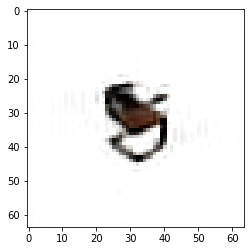

Step: 36200 Loss: 0.0034294435754418373
Step: 36400 Loss: 0.0035289397928863764


W0523 11:06:17.924410 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 36600 Loss: 0.003687310265377164


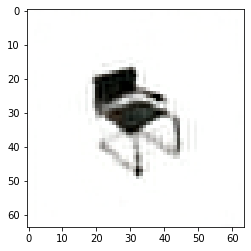

Step: 36800 Loss: 0.0035504475235939026
Step: 37000 Loss: 0.0032538119703531265


W0523 11:11:55.132652 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 37200 Loss: 0.0035464526154100895


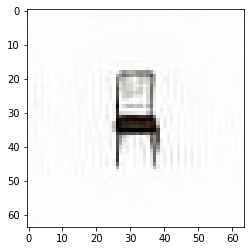

Step: 37400 Loss: 0.0034756544046103954
Step: 37600 Loss: 0.0037673937622457743


W0523 11:17:33.462894 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 37800 Loss: 0.0033398913219571114


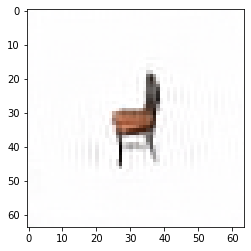

Step: 38000 Loss: 0.0035109114833176136
Step: 38200 Loss: 0.0035737736616283655


W0523 11:23:11.998587 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 38400 Loss: 0.0035775890573859215


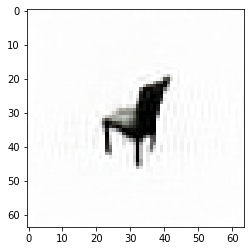

Step: 38600 Loss: 0.0035606324672698975
Step: 38800 Loss: 0.0032027035485953093


W0523 11:28:50.182221 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 39000 Loss: 0.003180194878950715


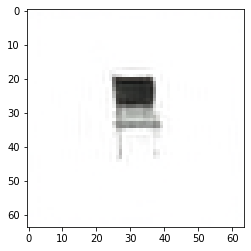

Step: 39200 Loss: 0.003240589750930667
Step: 39400 Loss: 0.0035739406011998653
Step: 39600 Loss: 0.003302148077636957


W0523 11:34:27.847241 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


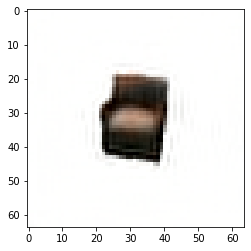

Step: 39800 Loss: 0.0033946221228688955
Step: 40000 Loss: 0.003442587098106742


W0523 11:40:07.122956 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 40200 Loss: 0.003420021152123809


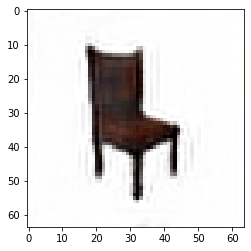

Step: 40400 Loss: 0.003337479429319501
Step: 40600 Loss: 0.003445899114012718


W0523 11:45:43.128413 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 40800 Loss: 0.0035483711399137974


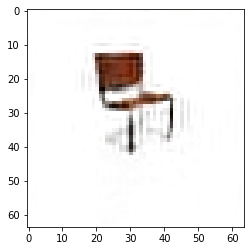

Step: 41000 Loss: 0.0032261318992823362
Step: 41200 Loss: 0.003410712582990527


W0523 11:51:24.412755 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 41400 Loss: 0.0034785899333655834


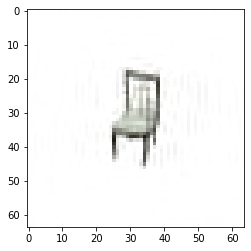

Step: 41600 Loss: 0.0035642581060528755
Step: 41800 Loss: 0.003520233789458871


W0523 11:57:03.386276 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 42000 Loss: 0.003217384684830904


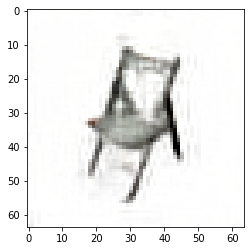

Step: 42200 Loss: 0.003580279415473342
Step: 42400 Loss: 0.0034591853618621826


W0523 12:02:42.586193 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 42600 Loss: 0.003284356091171503


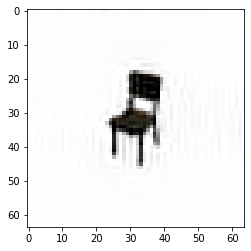

Step: 42800 Loss: 0.003619798691943288
Step: 43000 Loss: 0.003210612805560231


W0523 12:08:19.940045 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 43200 Loss: 0.0035280322190374136


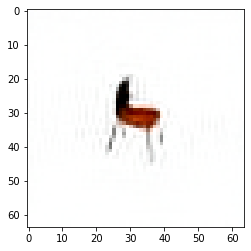

Step: 43400 Loss: 0.0034107875544577837
Step: 43600 Loss: 0.0033432263880968094


W0523 12:14:00.064489 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 43800 Loss: 0.0034082906786352396


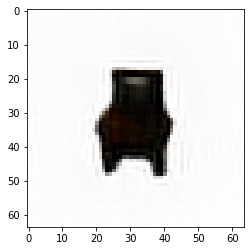

Step: 44000 Loss: 0.0033283219672739506
Step: 44200 Loss: 0.003246509935706854


W0523 12:19:38.738810 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 44400 Loss: 0.003154231235384941


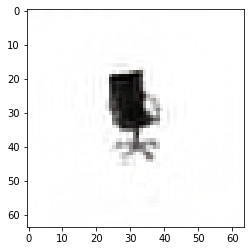

Step: 44600 Loss: 0.0032087683212012053
Step: 44800 Loss: 0.003371662925928831


W0523 12:25:15.921122 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 45000 Loss: 0.00309962360188365


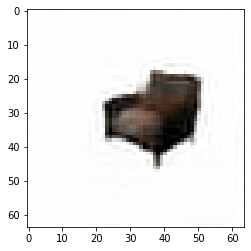

Step: 45200 Loss: 0.0031418330036103725
Step: 45400 Loss: 0.004177538678050041


W0523 12:30:56.826477 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 45600 Loss: 0.003530333051458001


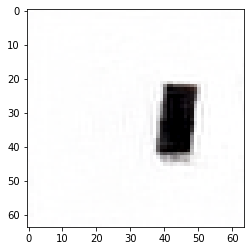

Step: 45800 Loss: 0.00317883538082242
Step: 46000 Loss: 0.0033209838438779116


W0523 12:36:33.501146 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 46200 Loss: 0.003554712049663067


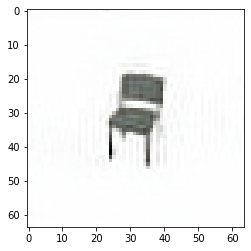

Step: 46400 Loss: 0.0034075884614139795
Step: 46600 Loss: 0.003194414312019944


W0523 12:42:12.290162 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 46800 Loss: 0.0032235304825007915


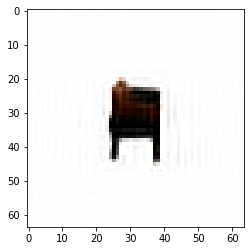

Step: 47000 Loss: 0.003268357366323471
Step: 47200 Loss: 0.0032026483677327633


W0523 12:47:50.761027 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 47400 Loss: 0.003275700379163027


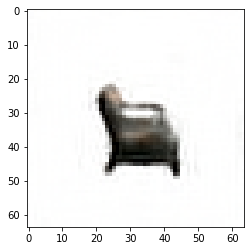

Step: 47600 Loss: 0.0033734035678207874
Step: 47800 Loss: 0.0033318428322672844


W0523 12:53:26.567019 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 48000 Loss: 0.003198418766260147


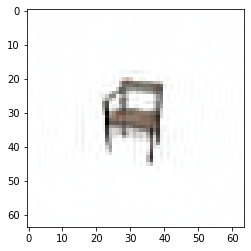

Step: 48200 Loss: 0.003120286390185356
Step: 48400 Loss: 0.0032162682618945837


W0523 12:59:02.765960 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 48600 Loss: 0.0033451018389314413


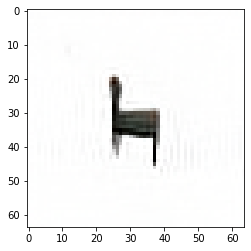

Step: 48800 Loss: 0.00321894115768373
Step: 49000 Loss: 0.003166178474202752


W0523 13:04:38.739504 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 49200 Loss: 0.003229821100831032


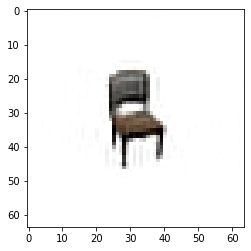

Step: 49400 Loss: 0.0031741317361593246
Step: 49600 Loss: 0.0033469281625002623


W0523 13:10:15.265571 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 49800 Loss: 0.003242991166189313


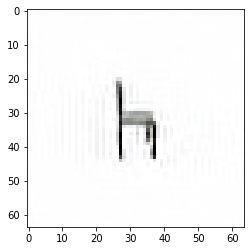

Step: 50000 Loss: 0.003283901372924447
Step: 50200 Loss: 0.003327995538711548


W0523 13:15:56.434222 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 50400 Loss: 0.0031714176293462515


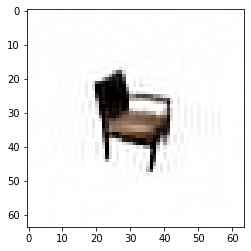

Step: 50600 Loss: 0.003363697323948145
Step: 50800 Loss: 0.0030701716896146536


W0523 13:21:34.423376 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 51000 Loss: 0.002991847926750779


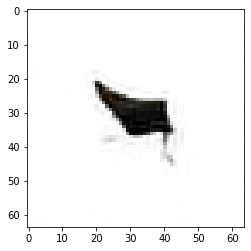

Step: 51200 Loss: 0.003237113356590271
Step: 51400 Loss: 0.0031006033532321453


W0523 13:27:13.483665 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 51600 Loss: 0.003346183802932501


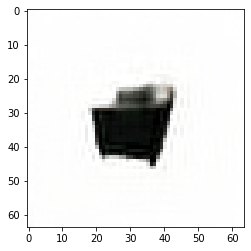

Step: 51800 Loss: 0.0032311936374753714
Step: 52000 Loss: 0.003191806375980377


W0523 13:32:52.505058 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 52200 Loss: 0.0030738848727196455


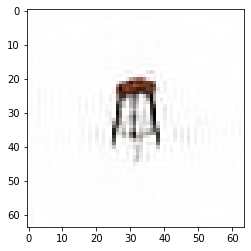

Step: 52400 Loss: 0.003292445093393326
Step: 52600 Loss: 0.003100641304627061


W0523 13:38:32.698319 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 52800 Loss: 0.003212609561160207


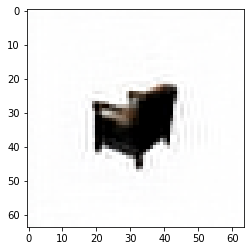

Step: 53000 Loss: 0.00315515766851604
Step: 53200 Loss: 0.003258229000493884


W0523 13:44:11.309808 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 53400 Loss: 0.0032968642190098763


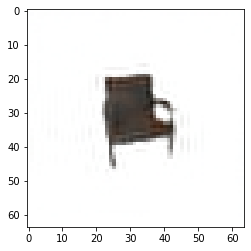

Step: 53600 Loss: 0.0030632049310952425
Step: 53800 Loss: 0.003155471757054329


W0523 13:49:53.613424 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 54000 Loss: 0.00314484816044569


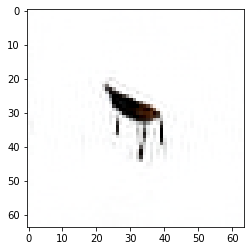

Step: 54200 Loss: 0.003415892366319895
Step: 54400 Loss: 0.0030223308131098747


W0523 13:55:31.320333 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 54600 Loss: 0.0029738424345850945


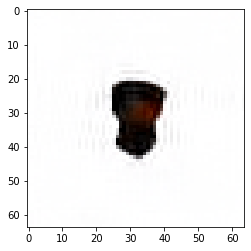

Step: 54800 Loss: 0.002824479714035988
Step: 55000 Loss: 0.002982823411002755


W0523 14:01:09.701438 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 55200 Loss: 0.0034437004942446947


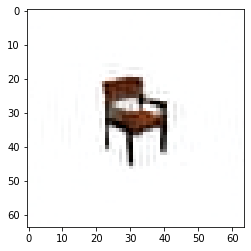

Step: 55400 Loss: 0.003512199968099594
Step: 55600 Loss: 0.0032155034132301807


W0523 14:06:50.559919 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 55800 Loss: 0.0031178698409348726


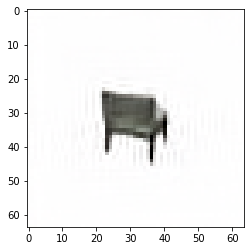

Step: 56000 Loss: 0.003171829739585519
Step: 56200 Loss: 0.0030388205777853727


W0523 14:12:31.001515 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 56400 Loss: 0.0031111433636397123


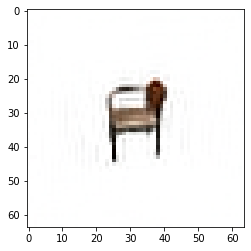

Step: 56600 Loss: 0.003092765575274825
Step: 56800 Loss: 0.003195015015080571
Step: 57000 Loss: 0.0030777184292674065


W0523 14:18:10.628289 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


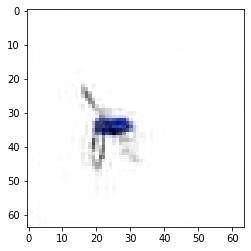

Step: 57200 Loss: 0.0028799022547900677
Step: 57400 Loss: 0.003081237431615591


W0523 14:23:50.227138 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 57600 Loss: 0.003406904172152281


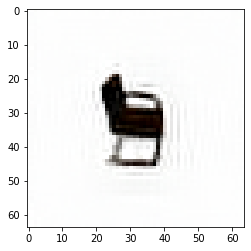

Step: 57800 Loss: 0.002989930799230933
Step: 58000 Loss: 0.0030558323487639427


W0523 14:29:29.028121 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 58200 Loss: 0.0030558796133846045


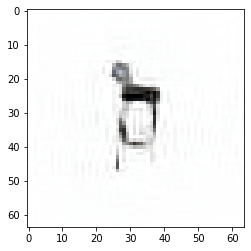

Step: 58400 Loss: 0.0030511771328747272
Step: 58600 Loss: 0.0032302469480782747


W0523 14:35:09.859674 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 58800 Loss: 0.003577034454792738


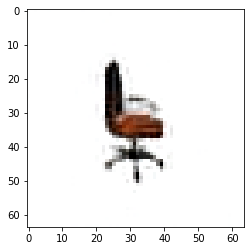

Step: 59000 Loss: 0.0033205728977918625
Step: 59200 Loss: 0.0030589259695261717


W0523 14:40:49.768693 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 59400 Loss: 0.0031032410915941


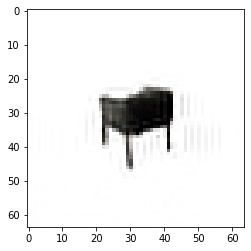

Step: 59600 Loss: 0.0033511025831103325
Step: 59800 Loss: 0.0030560216400772333


W0523 14:46:29.431373 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 60000 Loss: 0.0032189327757805586


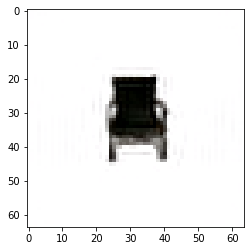

Step: 60200 Loss: 0.0030571874231100082
Step: 60400 Loss: 0.003086753888055682


W0523 14:52:06.665545 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 60600 Loss: 0.0029879205394536257


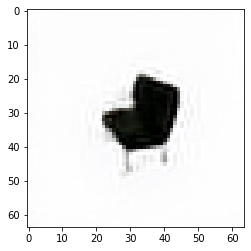

Step: 60800 Loss: 0.003258032724261284
Step: 61000 Loss: 0.003016679547727108


W0523 14:57:43.764081 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 61200 Loss: 0.0030651320703327656


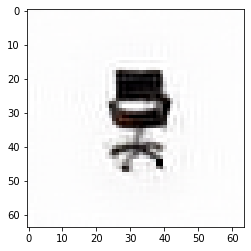

Step: 61400 Loss: 0.0032016183249652386
Step: 61600 Loss: 0.0030472392681986094


W0523 15:03:20.866605 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 61800 Loss: 0.0032798389438539743


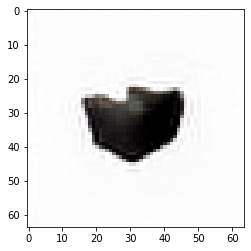

Step: 62000 Loss: 0.0029992922209203243
Step: 62200 Loss: 0.0032526329159736633


W0523 15:09:00.226096 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 62400 Loss: 0.002989675849676132


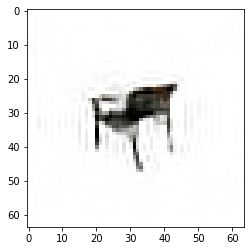

Step: 62600 Loss: 0.002969432156533003
Step: 62800 Loss: 0.0030043385922908783


W0523 15:14:40.214901 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 63000 Loss: 0.0028250524774193764


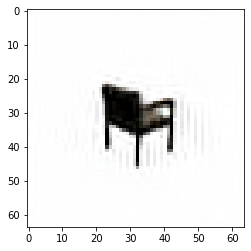

Step: 63200 Loss: 0.002824668772518635
Step: 63400 Loss: 0.003216824261471629


W0523 15:20:20.603638 13680 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step: 63600 Loss: 0.0029467972926795483


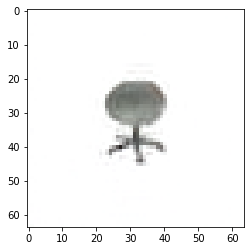

KeyboardInterrupt: 

In [7]:
train_steps = 150000
opt = tf.keras.optimizers.Adam()

start = time.time()
for step, img_batch in enumerate(data):
    
    if step > train_steps:
        break

    images, chair_ids, rot_ids, ele_ids = img_batch   
    
    with tf.GradientTape() as tape:
        # Multiply rotations with 11 to have proper angle & 20 for 0 elevation, 30 for 1 elevation
        rot_angles = ind_to_circle(tf.multiply(rot_ids, 11))
        ele_angles = ind_to_circle(np.where(ele_ids==0,20,30))
        
        out = model([chair_ids, rot_angles, ele_angles])
        r_err = r_loss(images, out)
        
    varis = model.trainable_variables
    grads = tape.gradient(r_err, varis)
      
    opt.apply_gradients(zip(grads, varis))
        
    if not step % 200:        
        print("Step: {} Loss: {}".format(step, tf.reduce_mean(r_err)))    
    if not step % 600:
        plt.imshow(out[0].numpy())
        plt.show()
        model.save_weights('chr_weights')
        
end = time.time()

print('Time Elapsed:', end - start)